In [2]:
from noisy_sine import *

cDim = 1

dataset = NoisySineDataset(dim=cDim, train_size=2**12)
X, y = dataset[:]

print(X.shape)
print(y.shape)

torch.Size([4096, 1])
torch.Size([4096, 1])


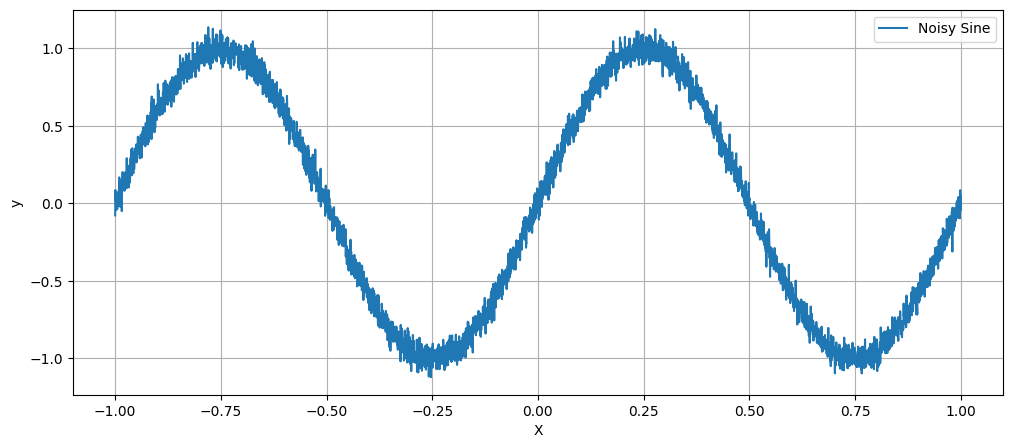

In [3]:
plt.figure(figsize=(12,5))
plt.plot(X, y, label = 'Noisy Sine')

#plt.xticks(range(0, 360, 10))
#plt.xticks(rotation=90)
plt.xlabel('X')
plt.ylabel('y')
#plt.title('Pertubation (PGD) vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()